In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos de entrenamiento y de test
datos_train = pd.read_csv('data/datos_train_limpios_con_vacios.csv', encoding = 'utf-8')
datos_test = pd.read_csv('data/datos_test_limpios_con_vacios.csv', encoding = 'utf-8')

In [3]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
datos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [5]:
# Reconstruir el conjunto de datos
datos = pd.concat([datos_train, datos_test], ignore_index = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Variables categóricas
vars_cat = [
  'workclass',         
  'education',         
  'marital-status',
  'occupation',        
  'relationship',      
  'race',              
  'sex',               
  'native-country',
  'class'
]

for var_cat in vars_cat:
  datos[var_cat] = pd.Categorical(datos[var_cat])

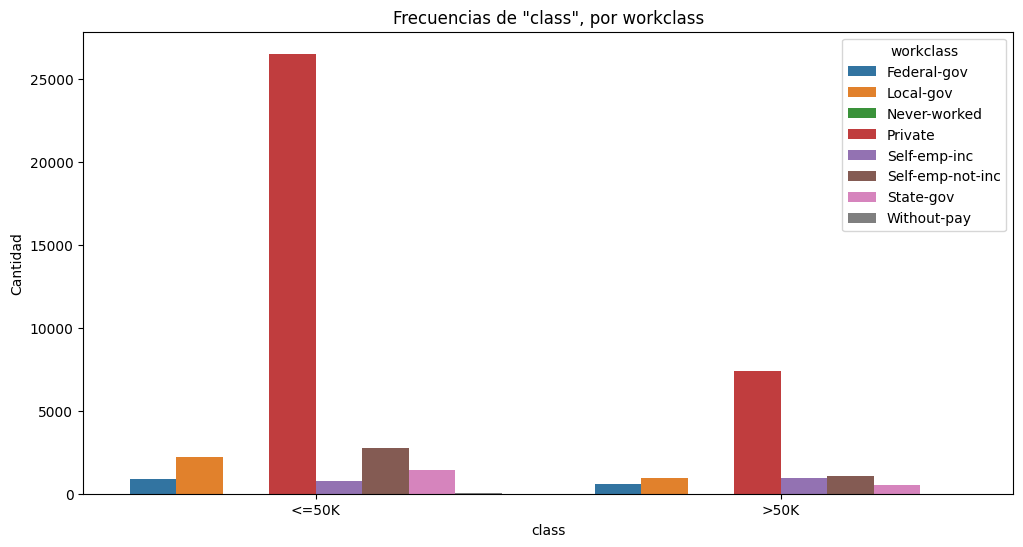

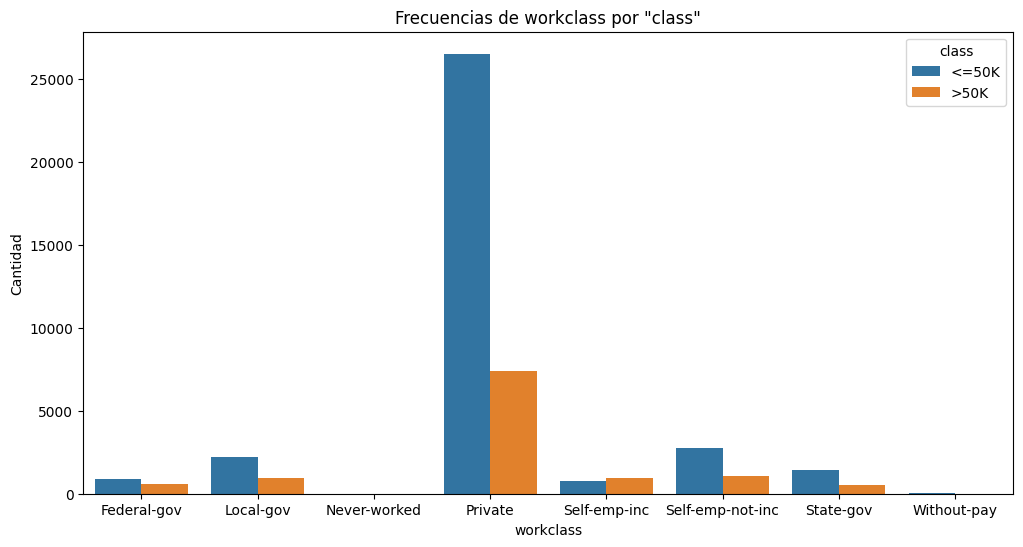

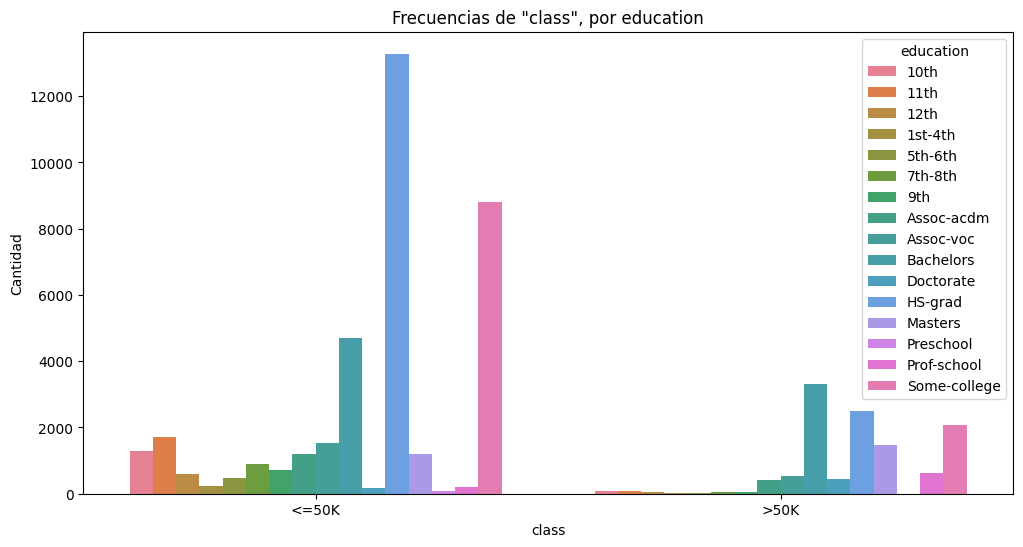

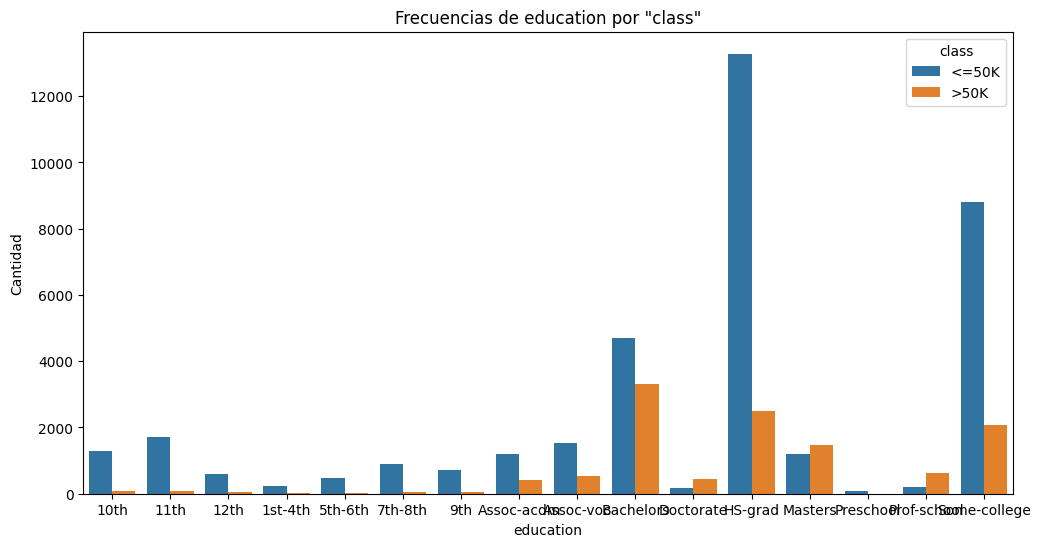

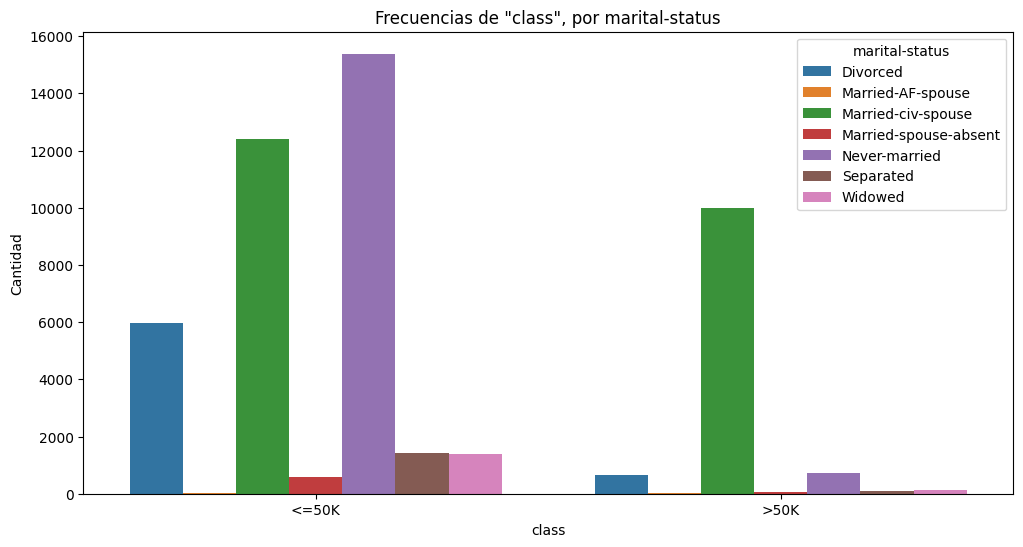

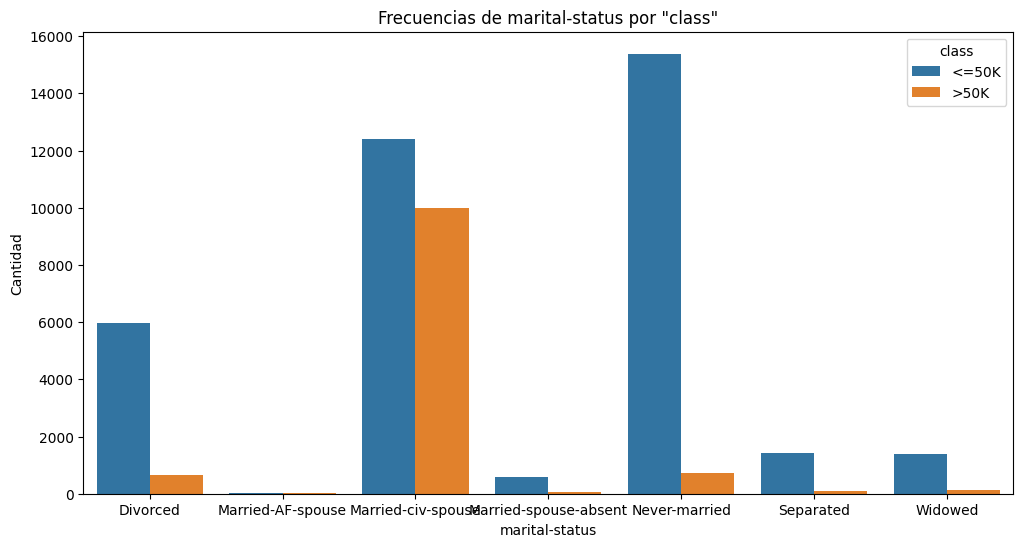

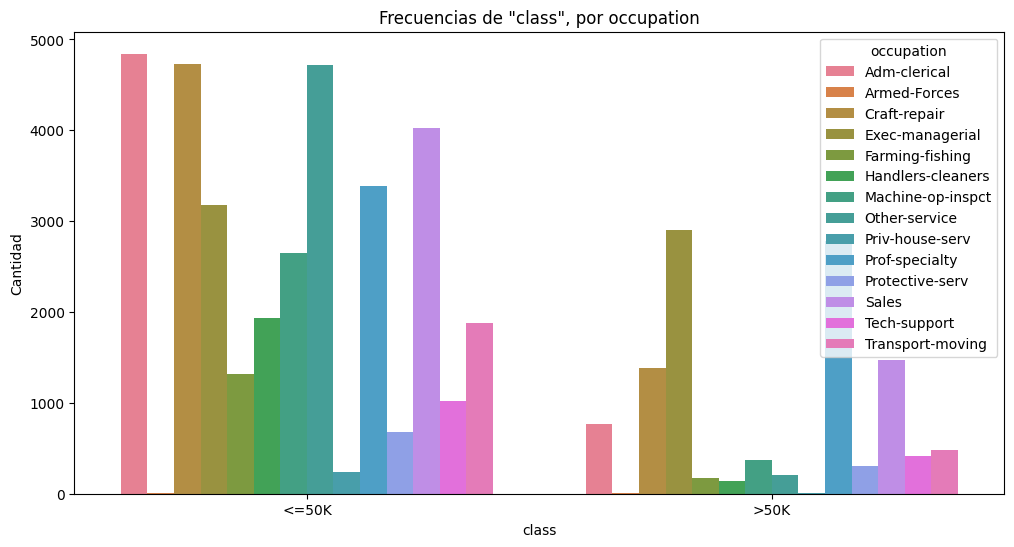

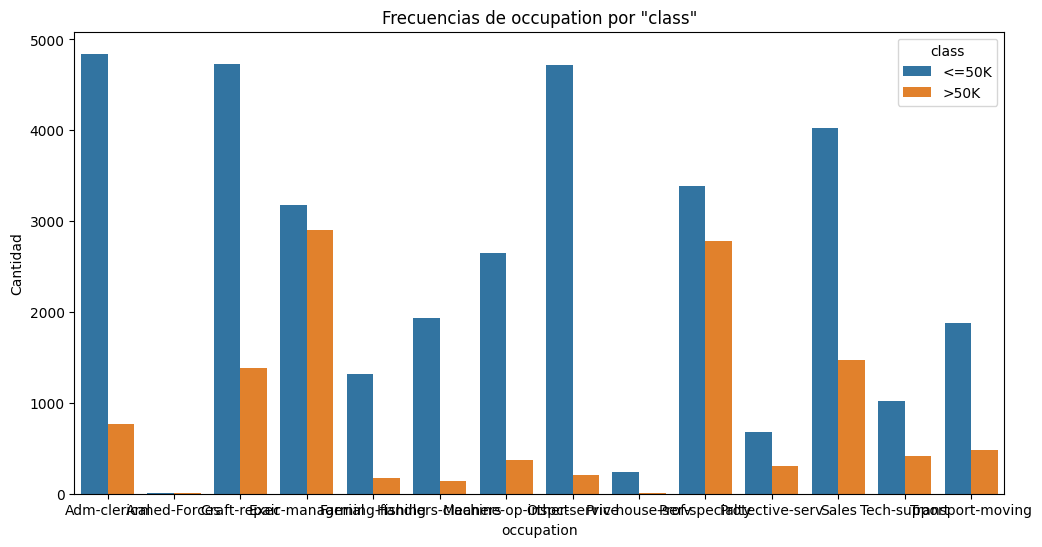

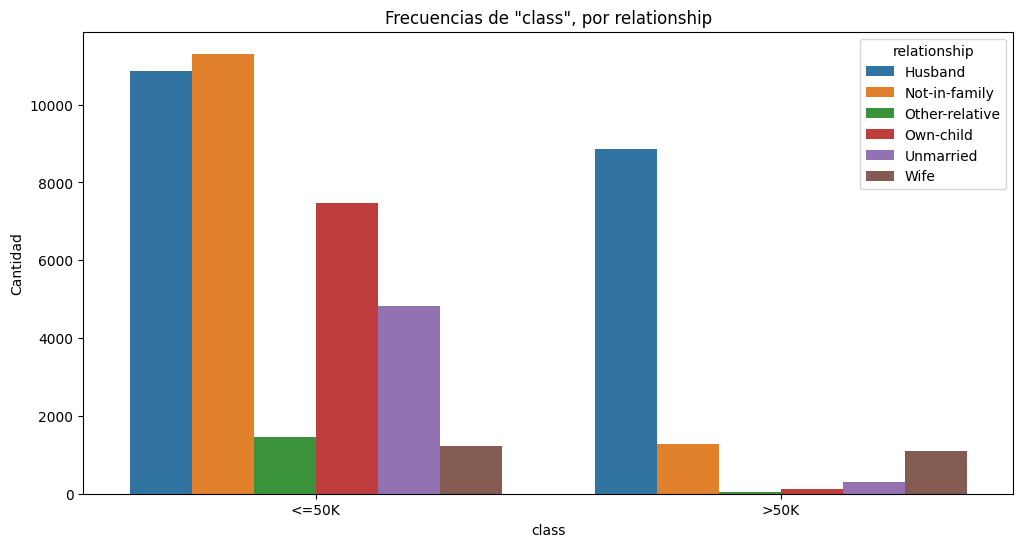

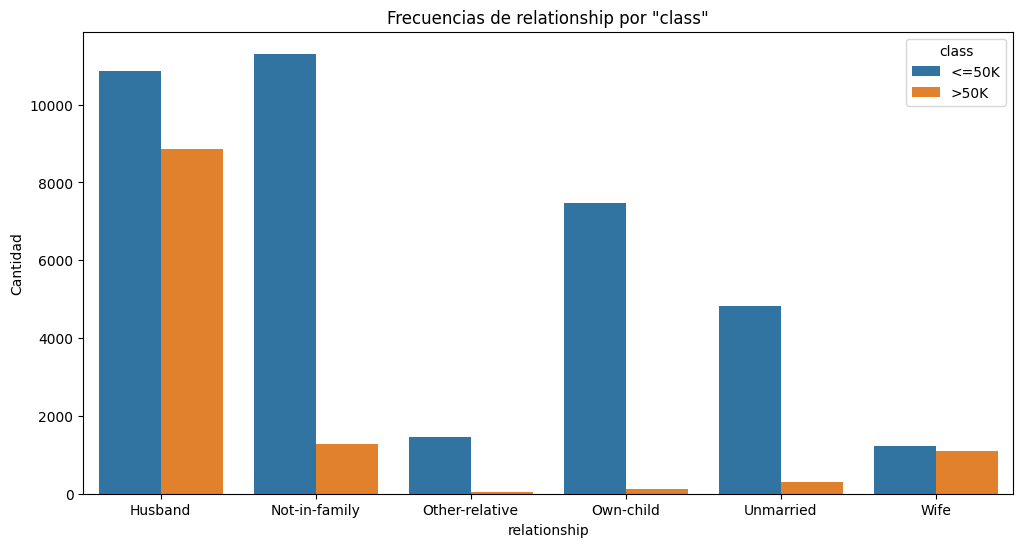

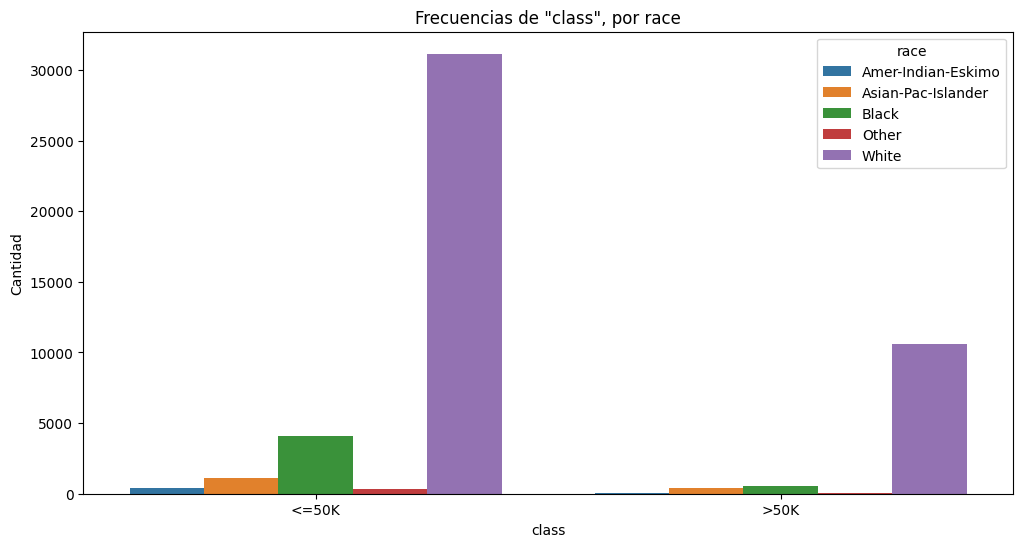

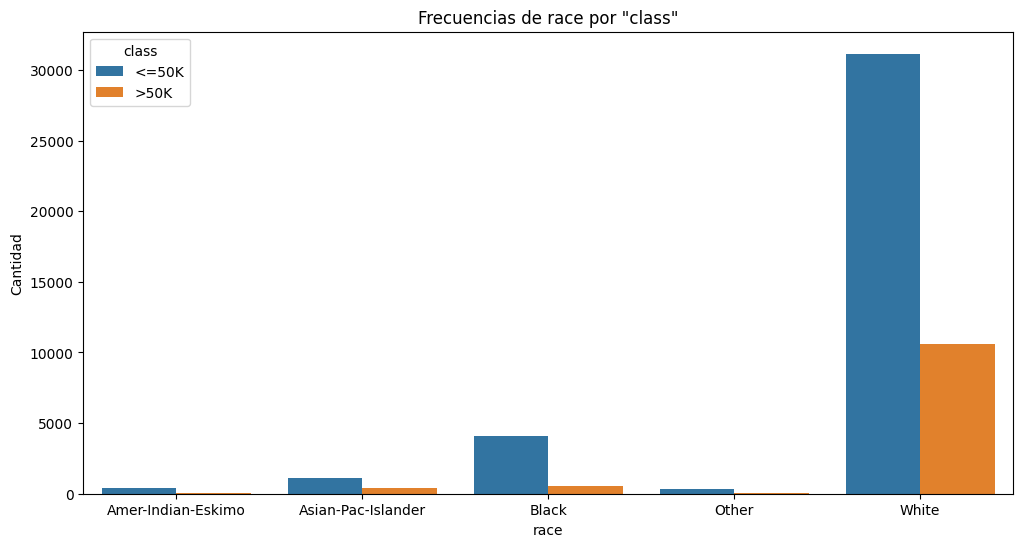

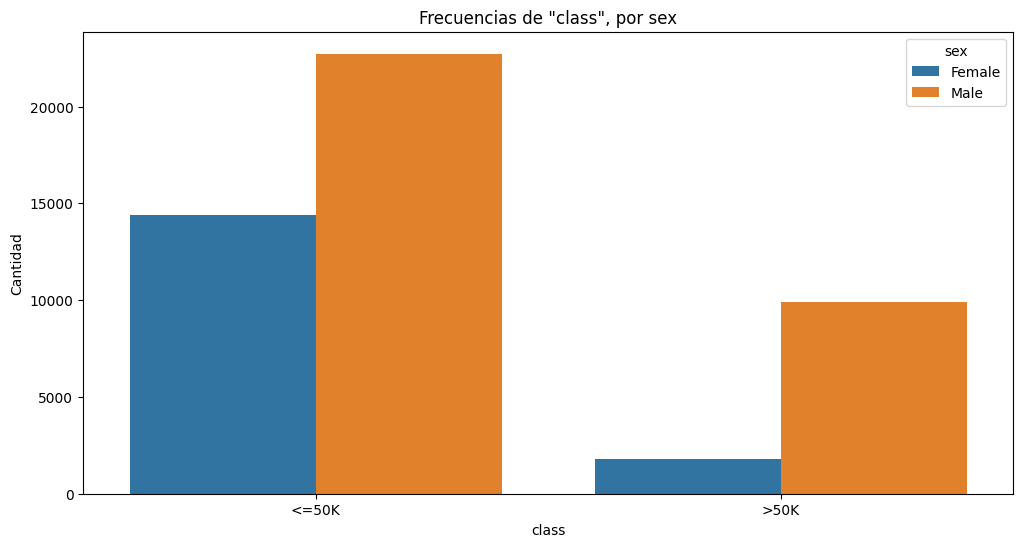

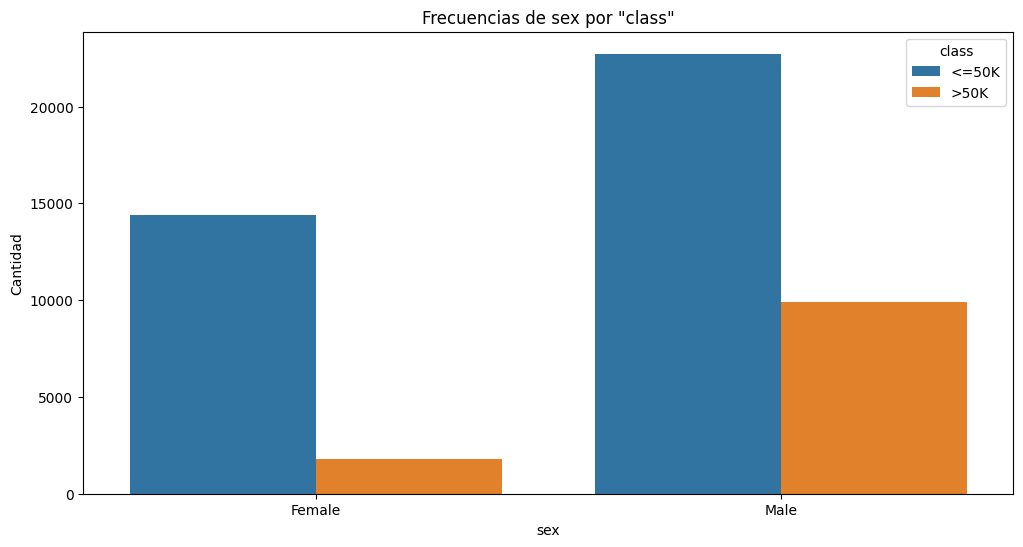

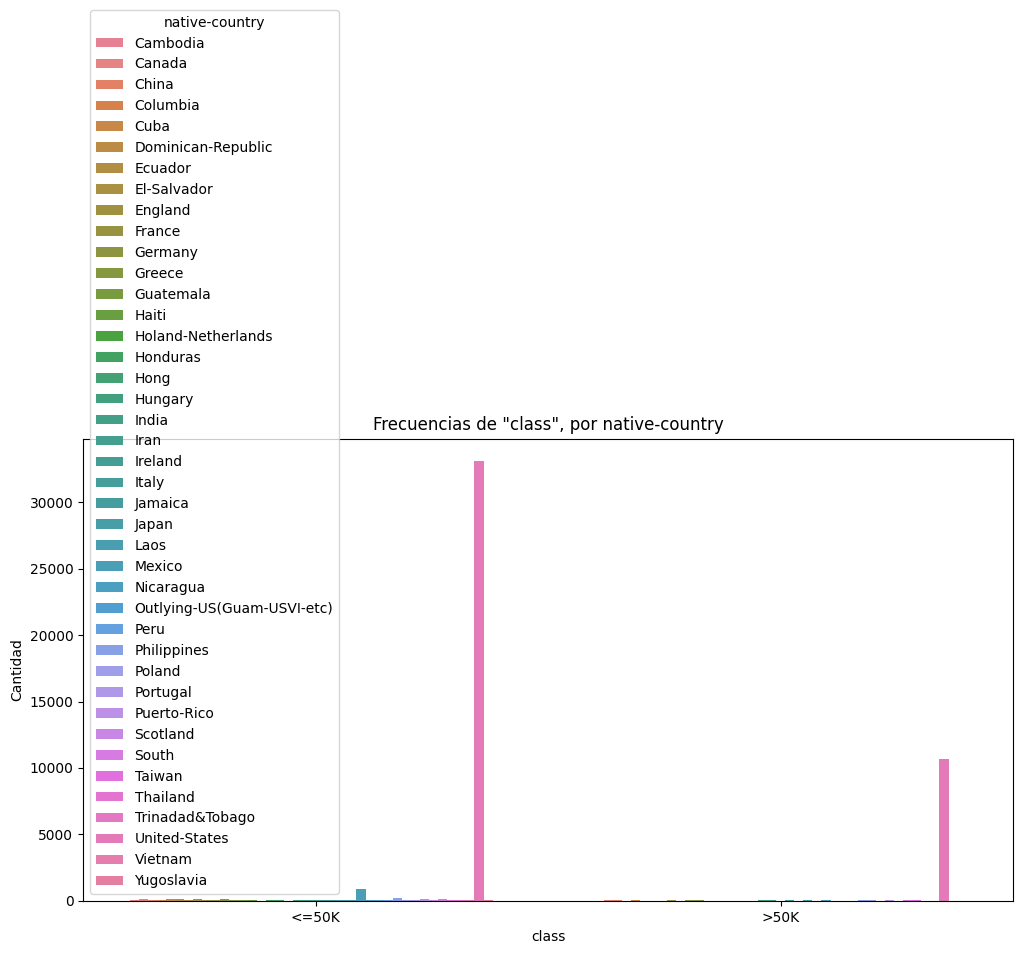

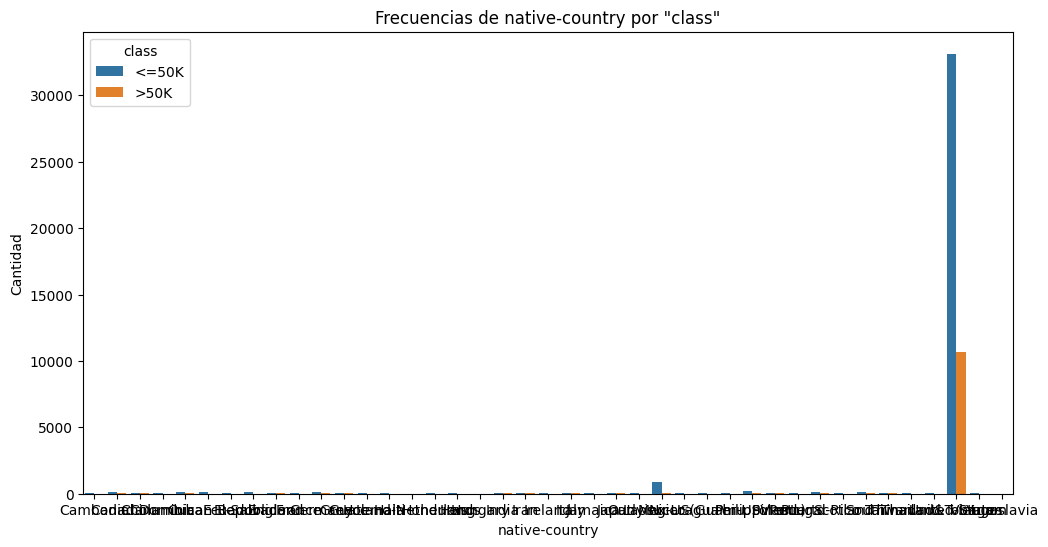

In [7]:
"""
Comparar variables categóricas con la variable por predecir
"""
for var_cat in vars_cat:
  if var_cat == 'class': continue

  frecuencias = datos.groupby(['class', var_cat]).size().reset_index(name='Cantidad')

  # Frecuencias de 'class' en cada variable categórica diferente
  plt.figure(figsize = (12, 6))
  sns.barplot(x = 'class', y = 'Cantidad', hue = var_cat, data = frecuencias)
  plt.title(f'Frecuencias de "class", por {var_cat}')
  plt.show()

  # Frecuencias de las otras variables categóricas, en cada categoría de 'class'
  plt.figure(figsize = (12, 6))
  sns.barplot(x = var_cat, y = 'Cantidad', hue = 'class', data = frecuencias)
  plt.title(f'Frecuencias de {var_cat} por "class"')
  plt.show()

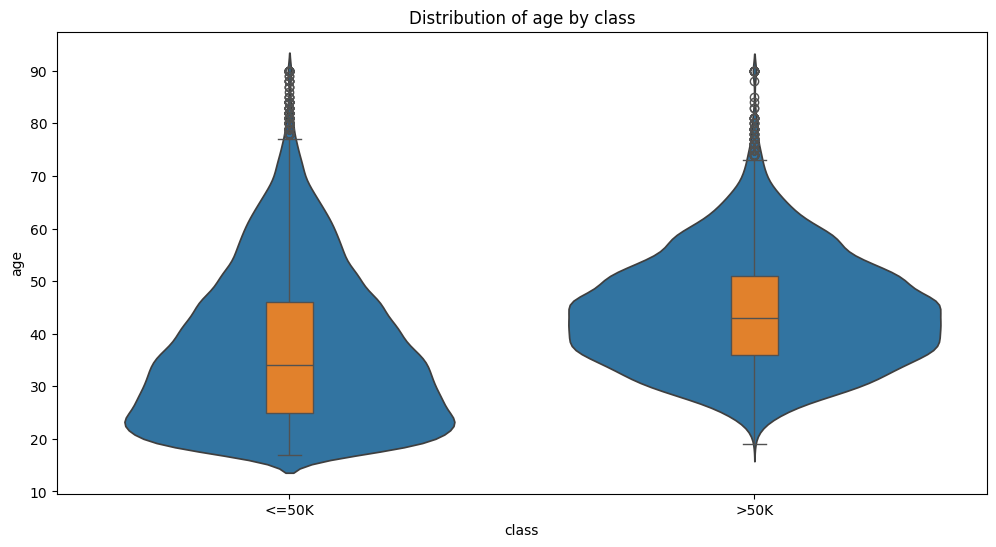

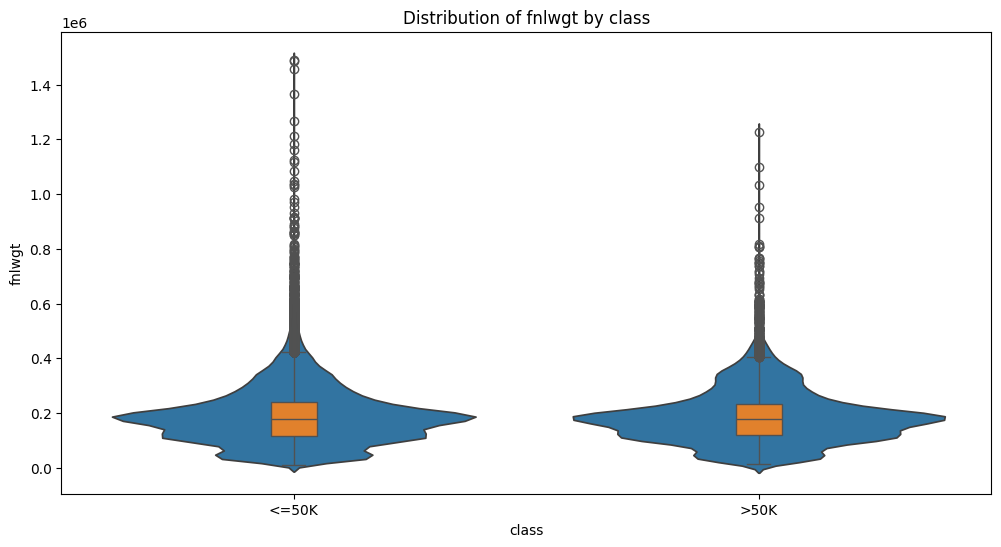

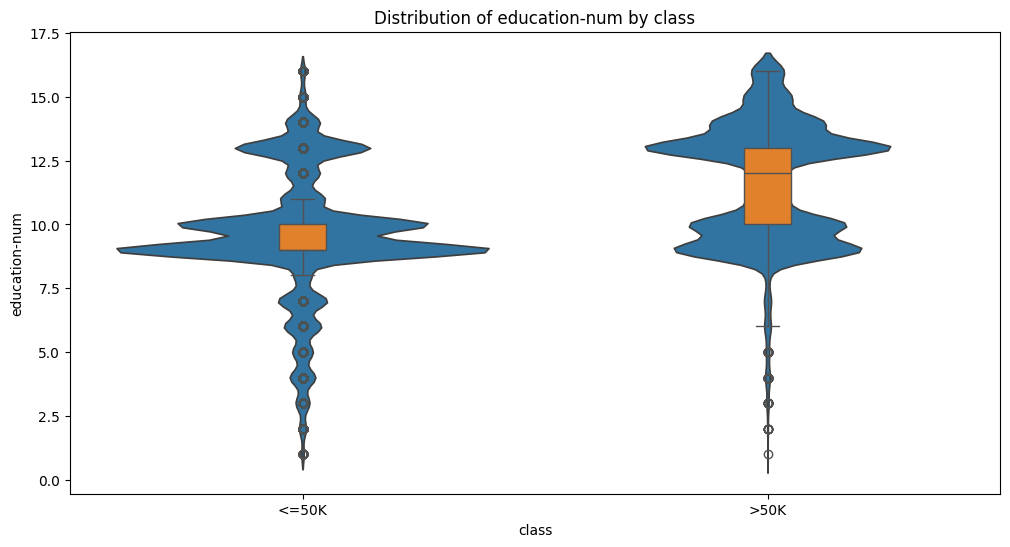

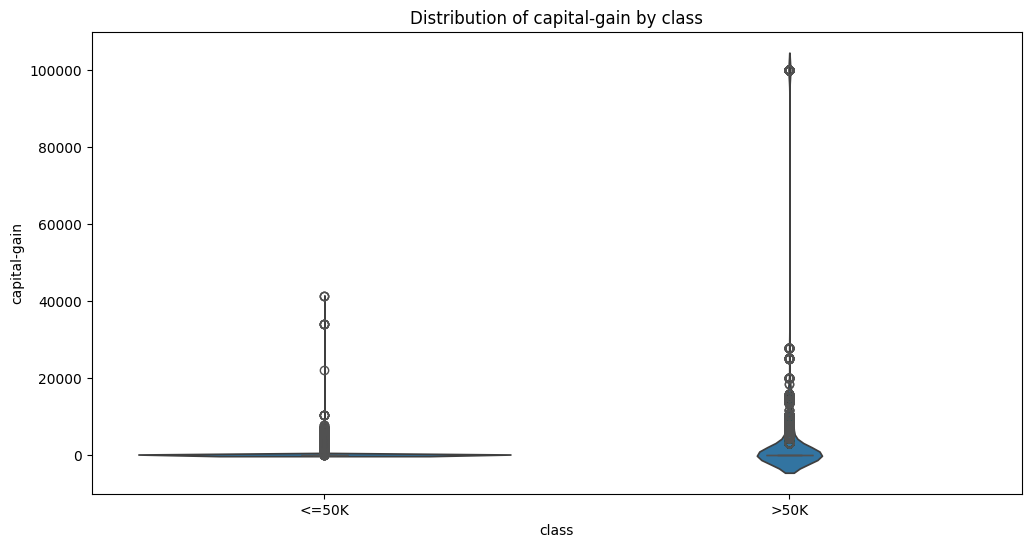

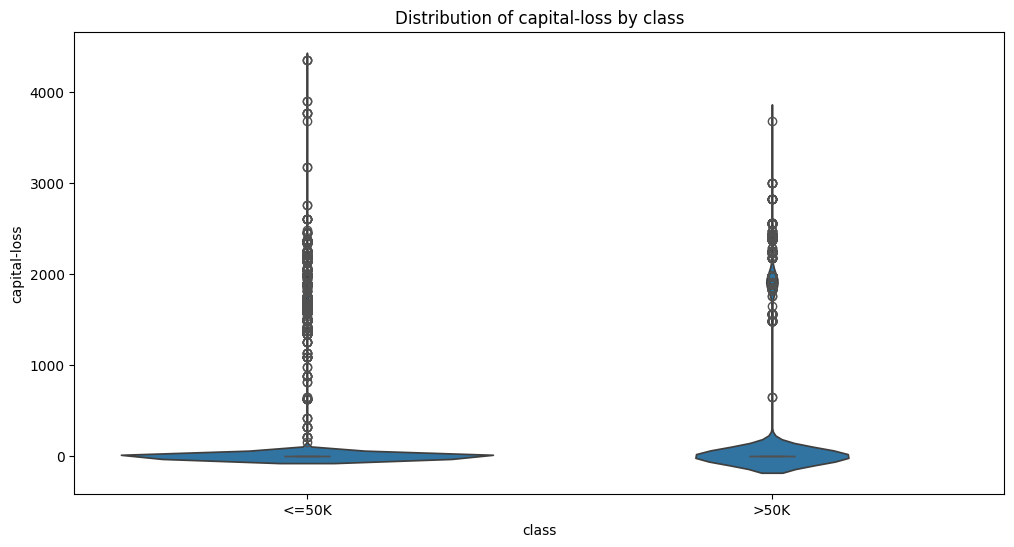

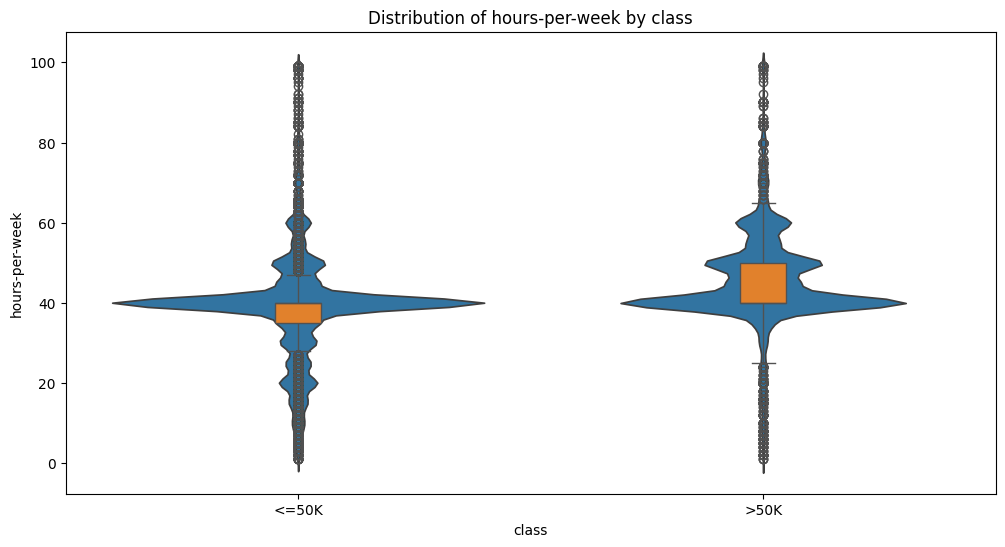

In [8]:
"""
Comparar variables numéricas con la variable por predecir
"""
# Variables numéricas
vars_num = [
  'age',
  "fnlwgt",
  "education-num",
  "capital-gain",
  "capital-loss",
  "hours-per-week"
]

for var_num in vars_num:
  plt.figure(figsize = (12, 6))
  sns.violinplot(x = 'class', y = var_num, data = datos, inner = None)
  sns.boxplot(x = 'class', y = var_num, data = datos, width = 0.1)
  plt.title(f'Distribution of {var_num} by class')
  plt.show()

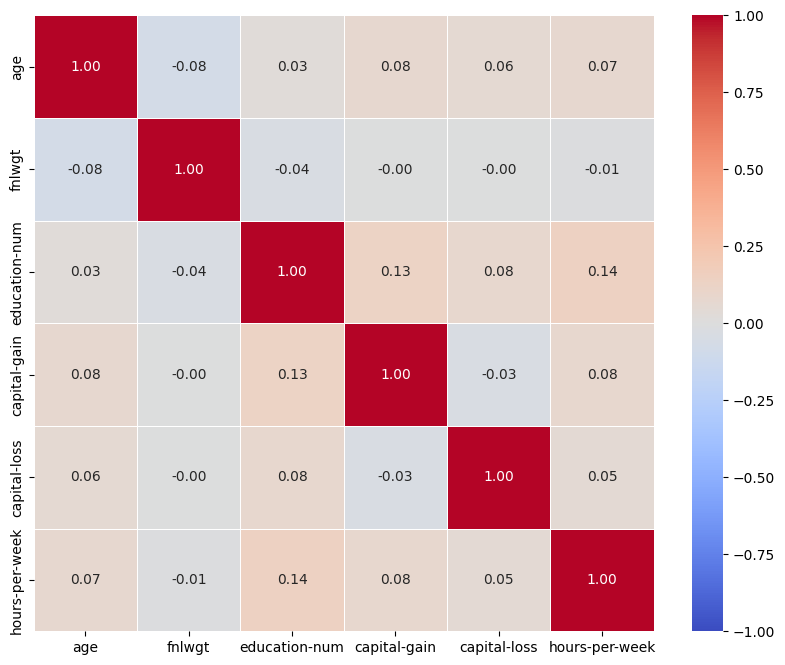

In [9]:
# Correlación entre las variables numéricas
matriz_de_correlaciones = datos[vars_num].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(
  matriz_de_correlaciones, 
  annot = True, 
  cmap = 'coolwarm', 
  vmin = -1, 
  vmax = 1, 
  fmt = '.2f',
  linewidths = 0.5
)
plt.show()